In [51]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16260, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 16260 (delta 66), reused 73 (delta 26), pack-reused 16103
Receiving objects: 100% (16260/16260), 15.06 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (11097/11097), done.


In [52]:
cd yolov5 && pip install -r requirements.txt

[Errno 2] No such file or directory: 'yolov5 && pip install -r requirements.txt'
/home/frackowiak/Documents/Drowssiness-Detection


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU is available")
else:
    device = torch.device('cpu')
    print("GPU is not available")

GPU is available


In [2]:
print(torch.__version__)

2.1.2+cu121


In [53]:
import subprocess

version = subprocess.check_output(['nvcc', '--version']).decode('utf-8').strip()
print(f"PyTorch CUDA version: {version}")

FileNotFoundError: [Errno 2] No such file or directory: 'nvcc'

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/frackowiak/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-9 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 3906MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
img = 'https://imgs.search.brave.com/STl275_7RYlTSagrJYIxOtsusnl5NN3yGPDYaUI_OQ0/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/ZnJlZS1waG90by9o/YXBweS1raWRzLWVs/ZW1lbnRhcnktc2No/b29sXzUzODc2LTEz/ODE0MS5qcGc_c2l6/ZT02MjYmZXh0PWpw/Zw'
results = model(img)
results.print()

image 1/1: 428x626 11 persons, 2 books
Speed: 236.2ms pre-process, 38.7ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


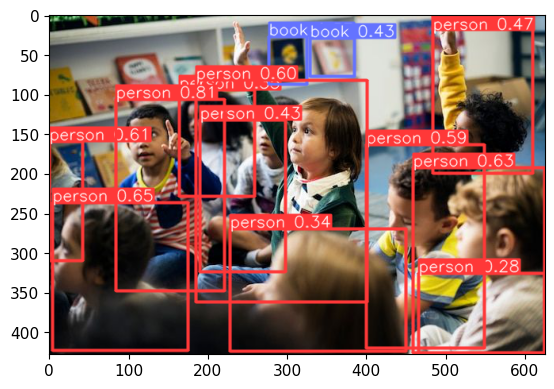

In [13]:
# %matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
np.array(results.render()).shape

(1, 428, 626, 3)

## Real Time Detections

In [23]:
import cv2

def show_camera(mirror=False):
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        if mirror:
            frame = cv2.flip(frame, 1)
        
        # Make detection
        results = model(frame)
        
        cv2.imshow('YOLO', np.squeeze(results.render()))
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    show_camera(mirror=True)


QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is n

## Train from scratch

In [25]:
import uuid  # Unique identifier
import os
import time

In [26]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [39]:
def take_photos(mirror=False):
    cap = cv2.VideoCapture(0)

    # Loop through labels
    for label in labels:
        print('Collecting images for {}'.format(label))
        time.sleep(5)

        # Loop through image range
        for img_num in range(number_imgs):
            print('Collecting images for {}, image number {}'.format(label, img_num))

            # Webcam feed
            ret, frame = cap.read()

            # Naming out image path
            imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

            # Writes out image to file 
            cv2.imwrite(imgname, frame)

            # Render to the screen
            cv2.imshow('Image Collection', frame)

            # 2 second delay between captures
            time.sleep(2)

            # Break out of inner loop if Q key is pressed
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        # Close the webcam and destroy the window
        cap.release()
        cv2.destroyAllWindows()

In [40]:
if __name__ == "__main__":
    take_photos(mirror=True)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is not the object's thread (0x24ba3840).
Cannot move to target thread (0x24ab1fe0)

QObject::moveToThread: Current thread (0x24ab1fe0) is n

error: OpenCV(4.9.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [49]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [50]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.grc

Traceback (most recent call last):
  File "/home/frackowiak/anaconda3/bin/pyrcc5", line 5, in <module>
    from PyQt5.pyrcc_main import main
  File "/home/frackowiak/anaconda3/lib/python3.11/site-packages/PyQt5/pyrcc_main.py", line 21, in <module>
    from PyQt5.QtCore import PYQT_VERSION_STR, QDir, QFile
ImportError: /home/frackowiak/anaconda3/lib/python3.11/site-packages/PyQt5/QtCore.abi3.so: undefined symbol: _ZdaPvm, version Qt_5


In [55]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/home/frackowiak/Documents/Drowssiness-Detection/yolov5/train.py", line 846, in <module>
    main(opt)
  File "/home/frackowiak/Documents/Drowssiness-Detection/yolov5/train.py", line 584, in main
    check_file(opt.

## Load model